## Exercise: Isolate clouds in the sattelite image


Algorithm: 

- First, we remove the edges (city names, geopraphic contours, etc).


- Then, we isolated the clouds.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean #reshape

In [3]:
from skimage.filters import roberts, sobel

In [5]:
image = io.imread("Satellite-No-Radar_20220621T20220621_1115.jpeg", as_gray= True)

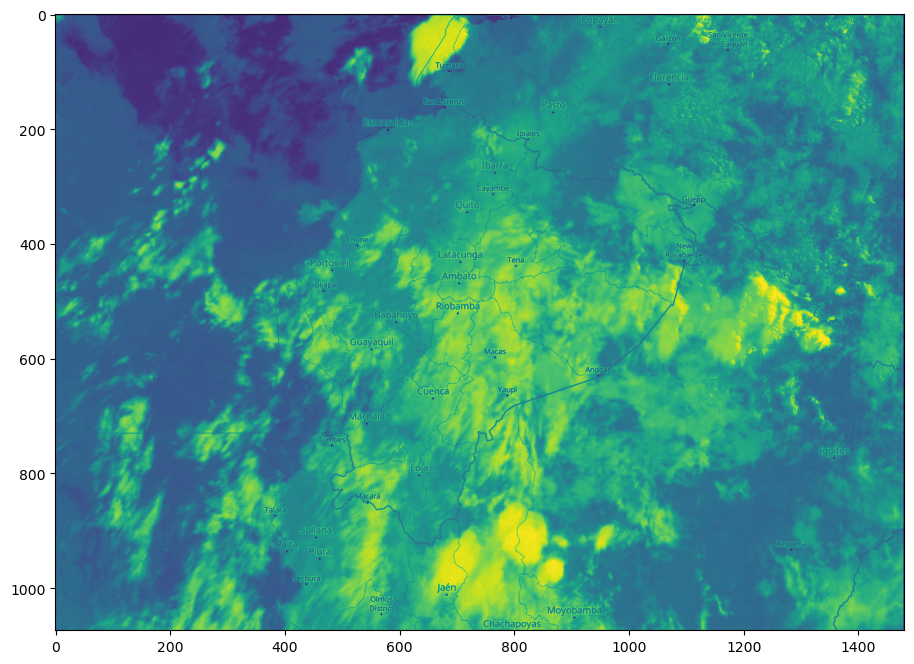

In [6]:
#%matplotlib inline

fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(image)
plt.show()

### 1. We apply the Roberts cross operator:

In [7]:
edge_filtered_image1 = roberts(image)

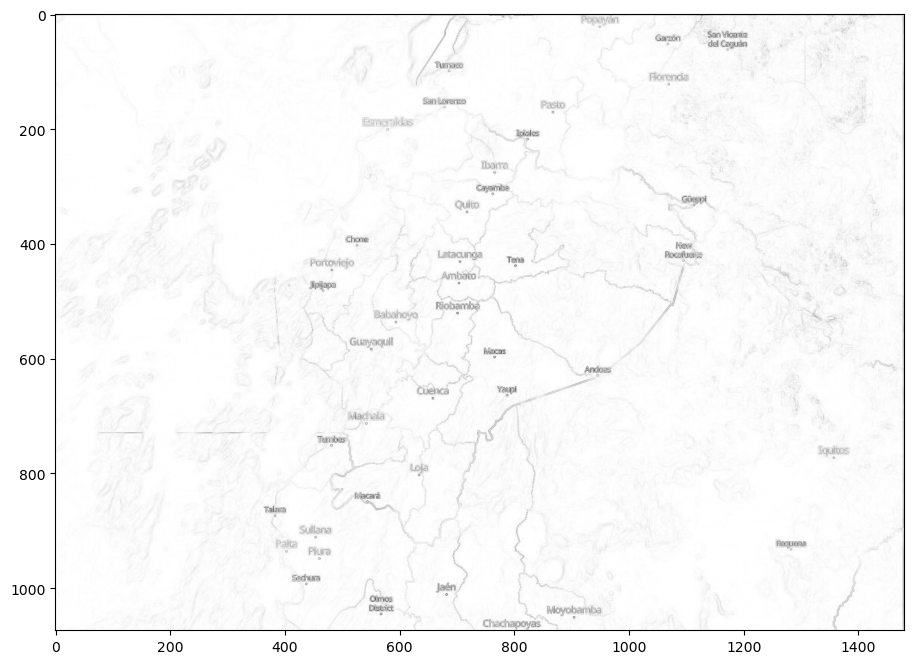

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(edge_filtered_image1, cmap= 'gray_r')
plt.show()

### 2. We isolate the edge pixels via tagging

In [9]:
print(np.max(edge_filtered_image1), np.min(edge_filtered_image1))

0.952978274059151 0.0


In [11]:
image1 = np.where(edge_filtered_image1 > 0.1, 1, 0)

print(np.unique(image1))

[0 1]


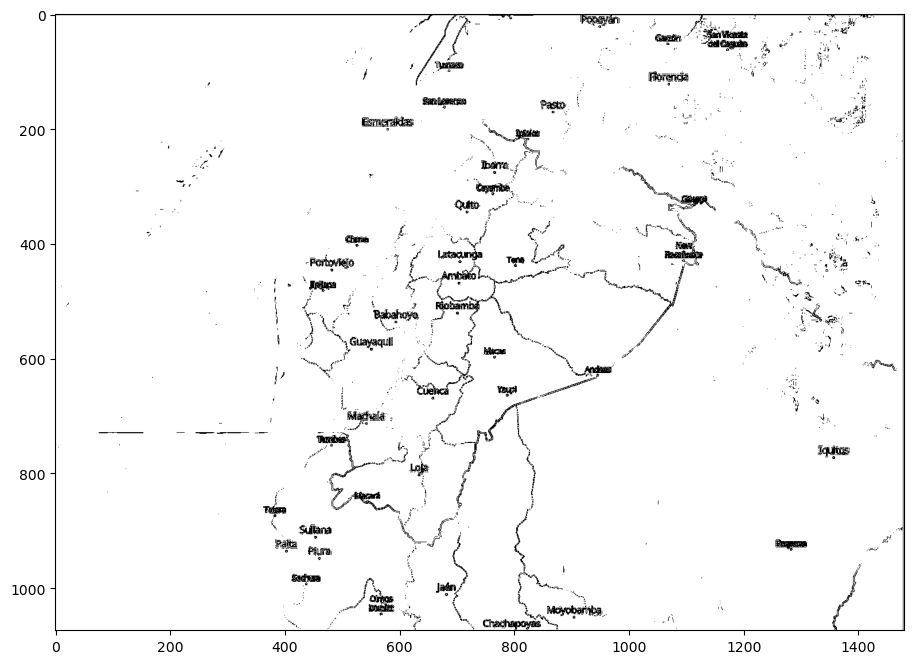

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(image1, cmap= 'gray_r')
plt.show()

### Looks good, so now we can use NaNs

In [25]:
image1 = np.where(edge_filtered_image1 > 0.01, np.nan, 0)

print(np.unique(image1))

[ 0. nan]


In [26]:
new_image = image - image*image1

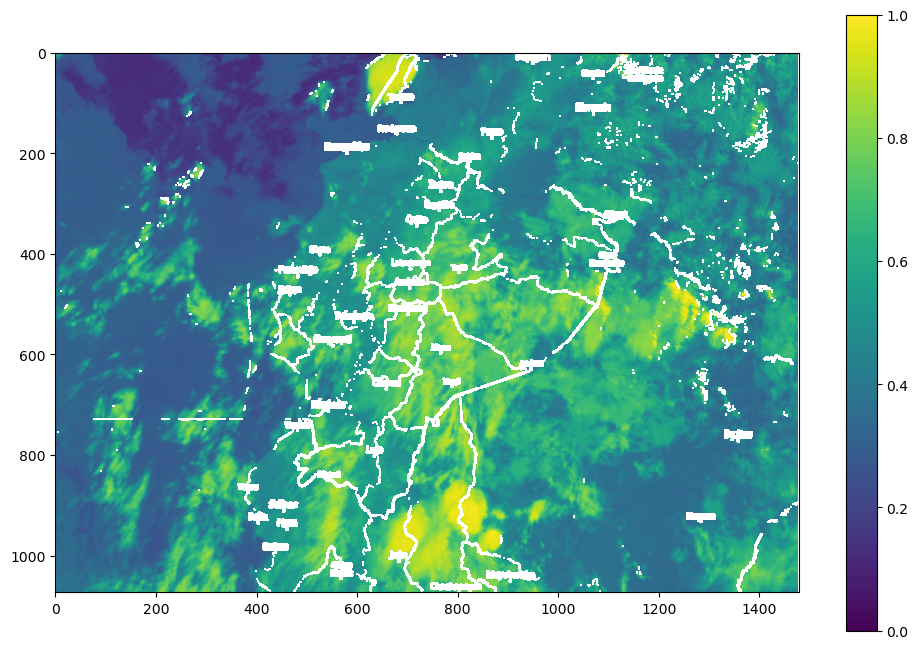

In [15]:
fig, ax = plt.subplots(figsize=(12,8))

A = ax.imshow(new_image)

plt.colorbar(A)

plt.show()

## 2D interpolation


- griddata() to carry out 2D interpolation

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html


- np.ma.masked_invalid() to mask NaNs.


- The bitwise NOT operator (~).

In [27]:
from scipy.interpolate import griddata

In [28]:
# Create a grid

x = np.arange(0,  new_image.shape[1])
y = np.arange(0,  new_image.shape[0])

# mask invalid values (nans)
array = np.ma.masked_invalid(new_image)

print(array.mask.shape)

# create grid
xx, yy = np.meshgrid(x, y)

(1074, 1480)


In [29]:
x1 = xx[~array.mask]
y1 = yy[~array.mask]

In [30]:
newarr = array[~array.mask]

In [31]:
# numpy.ravel - returns flattened array

GD1 = griddata((x1, y1), newarr.ravel(), (xx, yy), method='nearest')

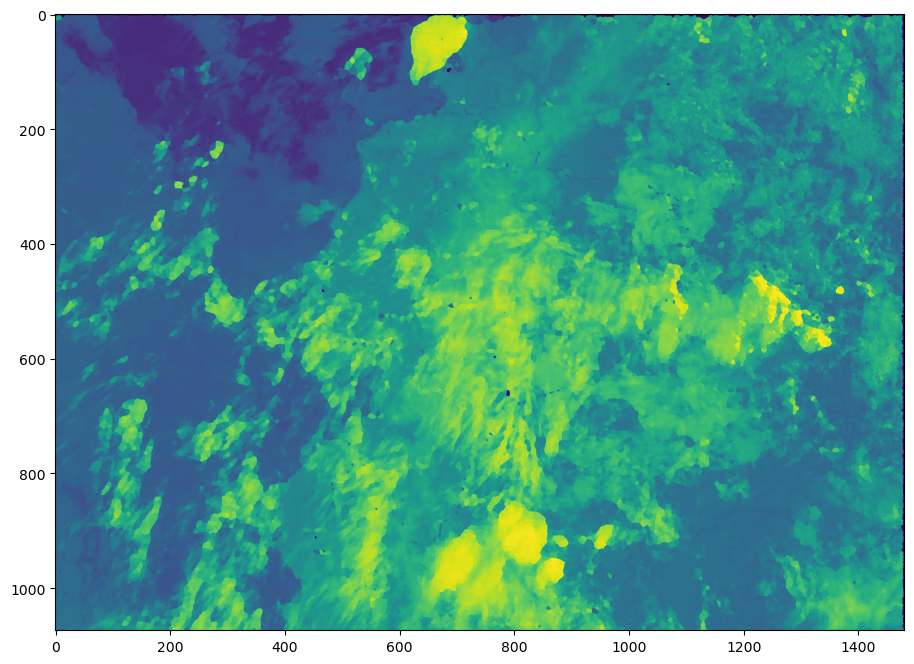

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(GD1)
plt.show()